# Market Basket Analysis

### Nama Kelompok

1. Peksyaji
2. Rachmat
3. Naufal Abdullah Hanif Wibowo
4. Ratu Meira Rasheeda Zahrah
5. Siti Dennis

## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Muat Dataset

In [2]:
df = pd.read_csv('https://github.com/viktree/curly-octo-chainsaw/raw/master/BreadBasket_DMS.csv')
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [3]:
df.shape

(21293, 4)

In [4]:
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


# Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [6]:
print(f'Banyak Item yang Unik : {df["Item"].nunique()}')
print(f'Item yang Unik : {df["Item"].unique()}')

Banyak Item yang Unik : 95
Item yang Unik : ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Span

In [7]:
# Mengecek data kosong
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [8]:
# Mengecek semua item bernilai "NONE"
df[df['Item'] == 'NONE']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [9]:
df.drop(df[df['Item']=='NONE'].index, inplace=True)

In [10]:
df

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [11]:
# Year 
df['Year'] = df['Date'].apply(lambda x: x.split("-")[0])
# Month
df['Month'] = df['Date'].apply(lambda x: x.split("-")[1])
# Day
df['Day'] = df['Date'].apply(lambda x: x.split("-")[2])

## Visualisasi Data

In [12]:
# Melihat range data
print(f'Range tanggal : {df["Date"].iloc[0]} - {df["Date"].iloc[-1]}')

Range tanggal : 2016-10-30 - 2017-04-09


In [13]:
# Melihat 15 item yang paling banyak terjual 
most_sold = df['Item'].value_counts().head(15)
print(most_sold)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Name: Item, dtype: int64


In [14]:
df.iloc[:,3]

0                Bread
1         Scandinavian
2         Scandinavian
3        Hot chocolate
4                  Jam
             ...      
21288           Coffee
21289              Tea
21290           Coffee
21291           Pastry
21292        Smoothies
Name: Item, Length: 20507, dtype: object

In [15]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
transaction_count

,Transaction
Item,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
...,...
Chicken sand,1
Gift voucher,1
Olum & polenta,1


In [16]:
# Fungsi untuk mengubah nilai pecahan menjadi persentase
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

In [17]:
transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


Text(0.5, 1.0, 'Item paling banyak terjual')

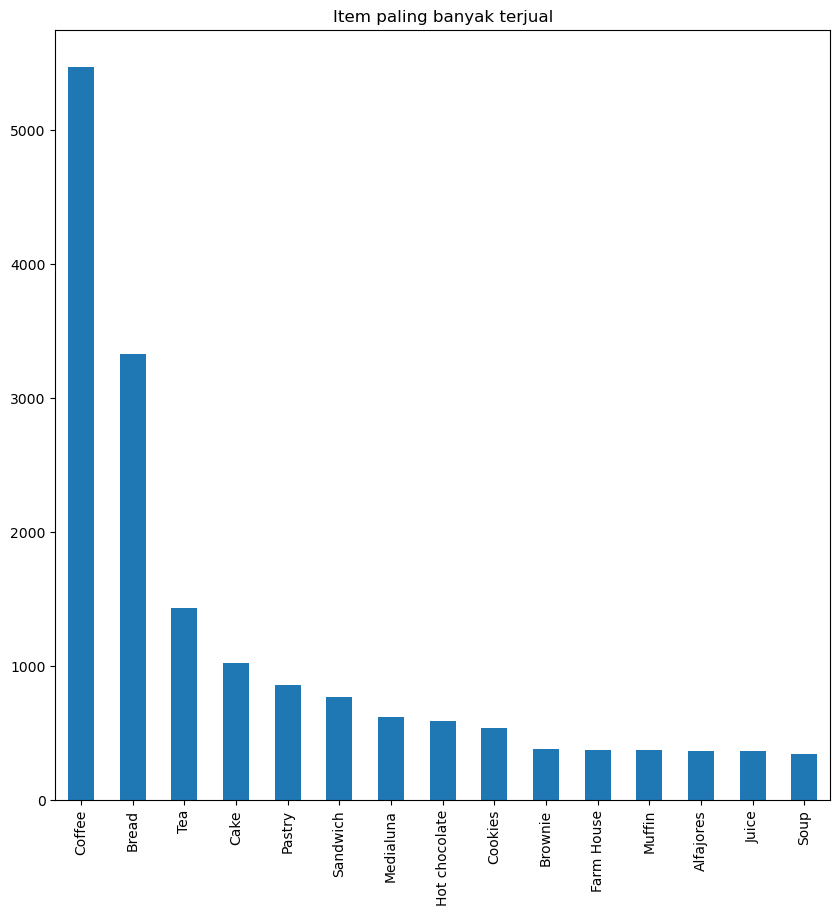

In [18]:
plt.figure(figsize=(10,10))

plt.subplot(1,1,1)
most_sold.plot(kind='bar')
plt.title('Item paling banyak terjual')

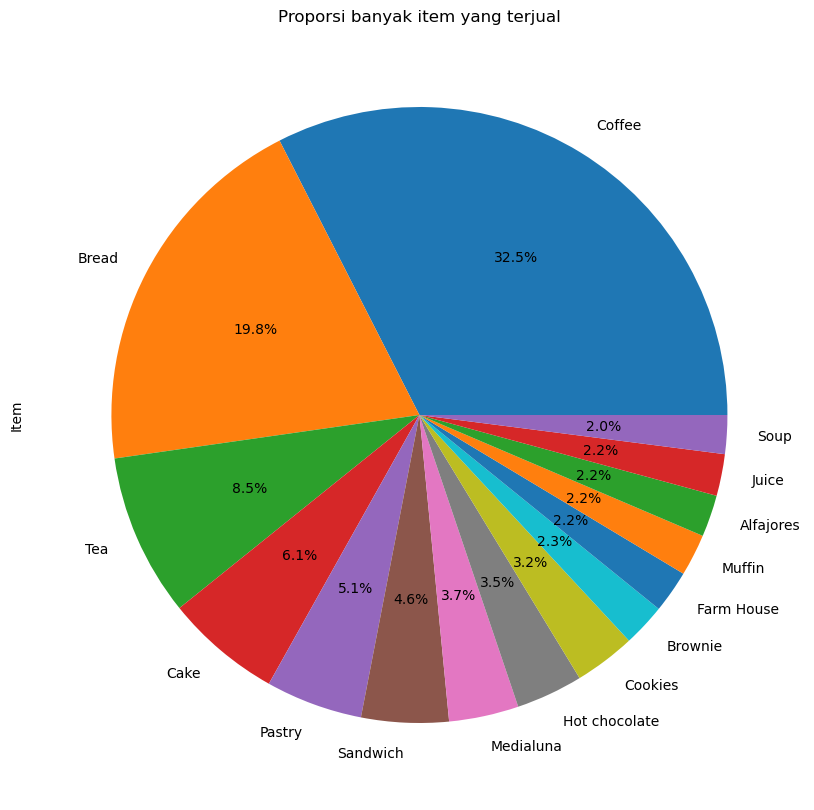

In [19]:
plt.figure(figsize=(20,10))
most_sold.plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Proporsi banyak item yang terjual')
plt.show()

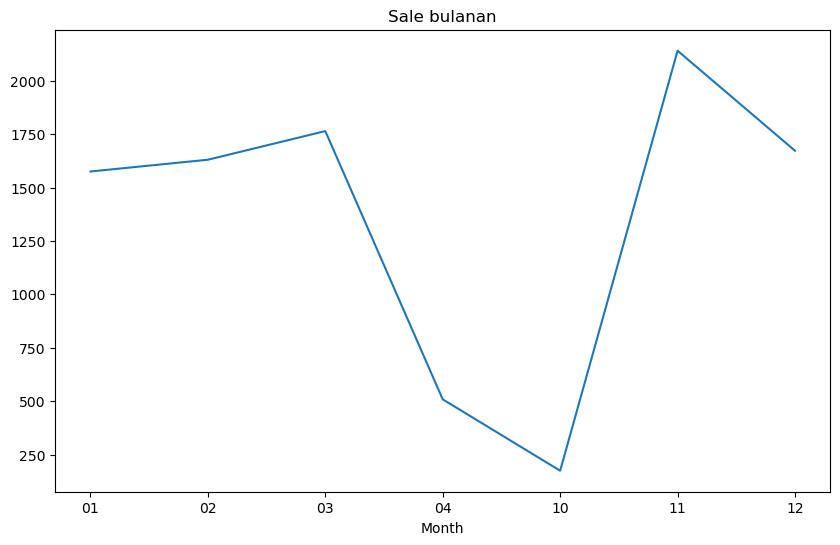

In [20]:
plt.figure(figsize=(10,6))

plt.subplot(1,1,1)
#plt.plot(most_sold)
df.groupby('Month')['Transaction'].nunique().plot(kind='line', title='Monthly Sales')
plt.title('Sale bulanan')
plt.show()

## MBA

In [21]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [22]:
transaction_list = []

# Membuat list terdiri dari nilai transaksi unik
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [23]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [41]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('support', ascending=False).head(15)

,antecedents,consequents,support,confidence,lift
8,(Bread),(Coffee),0.090016,0.275105,0.575059
9,(Coffee),(Bread),0.090016,0.188163,0.575059
25,(Coffee),(Cake),0.054728,0.114399,1.101515
24,(Cake),(Coffee),0.054728,0.526958,1.101515
51,(Coffee),(Tea),0.049868,0.104240,0.730840
50,(Tea),(Coffee),0.049868,0.349630,0.730840
41,(Coffee),(Pastry),0.047544,0.099382,1.154168
40,(Pastry),(Coffee),0.047544,0.552147,1.154168
43,(Coffee),(Sandwich),0.038246,0.079947,1.112792
42,(Sandwich),(Coffee),0.038246,0.532353,1.112792


# Kesimpulan

In [42]:
# Mengambil data dengan support > 49%
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.049)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('support', ascending=False)

,antecedents,consequents,support,confidence,lift
0,(Bread),(Coffee),0.090016,0.275105,0.575059
1,(Coffee),(Bread),0.090016,0.188163,0.575059
2,(Cake),(Coffee),0.054728,0.526958,1.101515
3,(Coffee),(Cake),0.054728,0.114399,1.101515
4,(Tea),(Coffee),0.049868,0.349630,0.730840
5,(Coffee),(Tea),0.049868,0.104240,0.730840


- Bread dan Coffee muncul bersamaan pada 9.0% transaksi, dengan nilai confidence sebesar 27.5% dan lift sebesar 0.58. Ini berarti peluang pembelian Coffee meningkat 58% jika pelanggan juga membeli Bread. Ini berarti dari total seluruh data terdapat 9.0% transaksi antara coffee dengan bread. 
- Kemudian, kemungkinan dibelinya coffee sebesar 27.5% jika pelanggan membeli bread.Namun, hal tersebut tidak berlaku sebaliknya. Jika pelanggan membeli coffee, kemungkinan pelanggan membeli bread hanya sebesar 18.8%. Lebih kecil dari hubungan confidence Bread -> Coffee.

- Cake dan Coffee muncul bersamaan pada 5.5% transaksi, dengan nilai confidence sebesar 52.7% dan lift sebesar 1.10. Ini menunjukkan bahwa pelanggan cenderung membeli Cake bersamaan dengan Coffee. Ini berarti dari total seluruh data terdapat 54% transaksi antara coffee dengan cake. 
- Kemudian, kemungkinan dibelinya coffee sebesar 52.6% jika pelanggan membeli cake. Namun, hal tersebut tidak berlaku sebaliknya. Jika pelanggan membeli coffee, kemungkinan pelanggan membeli cake hanya sebesar 11.4%. Lebih kecil dari hubungan confidence Cake -> Coffee

- Tea dan Coffee muncul bersamaan pada 4.9% transaksi, dengan nilai confidence sebesar 34.9% dan lift sebesar 0.73. Ini menunjukkan bahwa peluang pembelian Coffee menurun sebesar 27% jika pelanggan juga membeli Tea.